# Practice Project: Insurance Cost Analysis

#### Objectives

- Load the data as a pandas dataframe
- Clean the data, taking care of the blank entries
- Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
- Develop single variable and multi variable Linear Regression models for predicting the charges
- Use Ridge regression to refine the performance of Linear regression models.

In [5]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Import the dataset

In [13]:
#download the dataset
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [15]:
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [17]:
#assigning headers
headers = ['Age','Gender', 'BMI','No_of_children','Smoker','region','Charges']
df.columns = headers

In [19]:
df.head(10)

,Age,Gender,BMI,No_of_children,Smoker,region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [21]:
#replacing '?' with Nan
df.replace('?',np.nan, inplace = True)

### Data Wrangling

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2768 non-null   object 
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [29]:
#age is a continuous variable, replace with mean age
avg_age = df['Age'].astype('float').mean(axis=0)
print('The average age is:', avg_age)

The average age is: 39.10982658959538


In [33]:
df['Age'] = df['Age'].replace(np.nan, avg_age)

In [39]:
# smoker is a categorical attribute, replace with most frequent entry
smoker_freq = df['Smoker'].value_counts().idxmax()
df['Smoker'] = df['Smoker'].replace(np.nan, smoker_freq)

In [43]:
#Update data types
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   int32  
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


In [49]:
#roundoff the charge column
df[['Charges']]= np.round(df[['Charges']],2)

In [51]:
df.head()

,Age,Gender,BMI,No_of_children,Smoker,region,Charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


### Exploratory Data Analysis (EDA)

(0.0, 66902.85800000001)

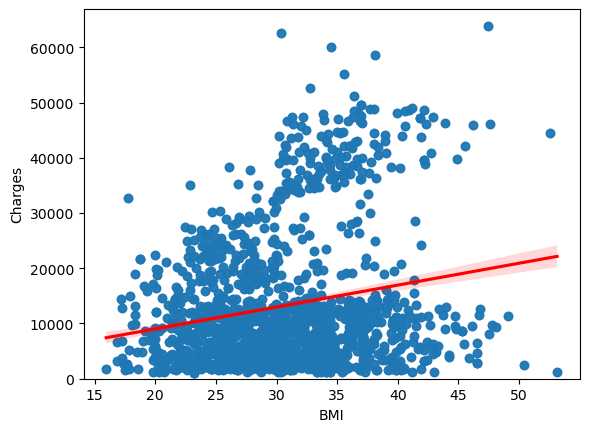

In [62]:
#Implement the regression plot for charges with respect to bmi
sns.regplot(x='BMI', y='Charges', data=df, line_kws={'color':'red'})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

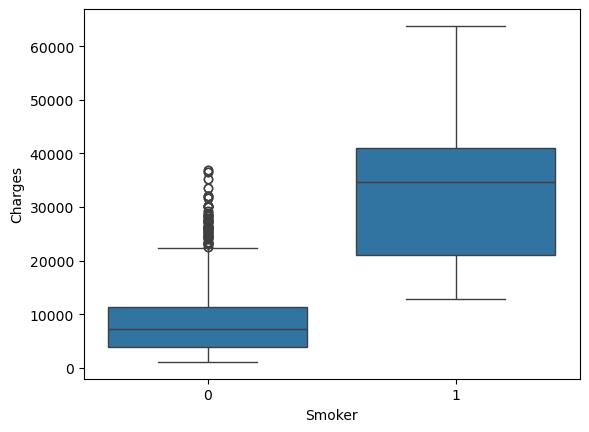

In [64]:
#implement boxplot for charges vs smoker
sns.boxplot(x='Smoker', y='Charges', data=df)

In [66]:
df.corr()

,Age,Gender,BMI,No_of_children,Smoker,region,Charges
Age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


##### Interpretation
- Strongest Predictor: Smoker
- Useful Features: Age, BMI
- Less Important: Gender, Region, Children

### Model Development

In [75]:
lm = LinearRegression()
X = df[['Smoker']]
Y = df['Charges']
lm.fit(X,Y )
print('The r2 value is:', lm.score(X,Y))

The r2 value is: 0.6221791733924185


In [79]:
Z = df[["Age", "Gender", "BMI", "No_of_children", "Smoker", "region"]]
lm.fit(Z,Y)
print('The r2 value is:', lm.score(Z,Y))

The r2 value is: 0.7504083820289634


Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [82]:
Input = [('Scale',StandardScaler()),('Polynomial',PolynomialFeatures()),('model',LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452576213500093


### Model Refinement

In [85]:
#Spliting the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(Z ,Y ,test_size=0.20 , random_state=1)

Initialize a Ridge regressor that used hyperparameter alpha=0.1. Fit the model using training data data subset. Print the r2 score for the testing data.

In [90]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
Yhat = RidgeModel.predict(x_test)
r2_score(y_test,Yhat)

0.6760807731582408

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the  r2 score for the testing subset.

In [99]:
pr = PolynomialFeatures(degree =2)
x_train_pr= pr.fit_transform(x_train)
x_test_pr= pr.transform(x_test)
RidgeModel.fit(x_train_pr,y_train)
Yhat1 = RidgeModel.predict(x_test_pr)
r2_score(y_test,Yhat1)

0.7835631107608149

#### Interpretation
The r2 score increased from 0.676 to 0.783 when polynomial degree of 2 were introcuded, indicating that the model perform better in explaining variancein the dependent variable after incorprating non linear relationship through polynomial transformation.

In [ ]:
* Yogita Goh